# Customer Segmentation using Clustering Algorithms
## Objective
In this project, we perform **customer segmentation** using clustering techniques. 
The goal is to group customers based on their purchasing behavior to help businesses 
personalize marketing strategies.

## Clustering Algorithms Used
- **K-Means Clustering**
- **DBSCAN (Density-Based Clustering)**
- **Hierarchical Clustering**


## Load Dataset and Perform Initial Exploration
We begin by loading the dataset and checking for missing values, data types, and basic statistics.


In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import scipy.cluster.hierarchy as sch

# Load dataset
df = pd.read_csv("marketing_campaign.csv", delimiter="\t")  # Use tab as delimiter
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Preprocessing
Before applying clustering algorithms, we need to:
- Handle missing values
- Convert categorical features to numeric
- Select relevant numerical features
- Normalize the data using `StandardScaler`


In [42]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing values
df.dropna(inplace=True)

# Convert categorical features (if any)
df = pd.get_dummies(df, drop_first=True)

# Select relevant features for clustering
selected_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_selected = df[selected_features]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)


Missing values:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


## Finding the Optimal Number of Clusters
We use the **Elbow Method** to determine the best number of clusters for K-Means.


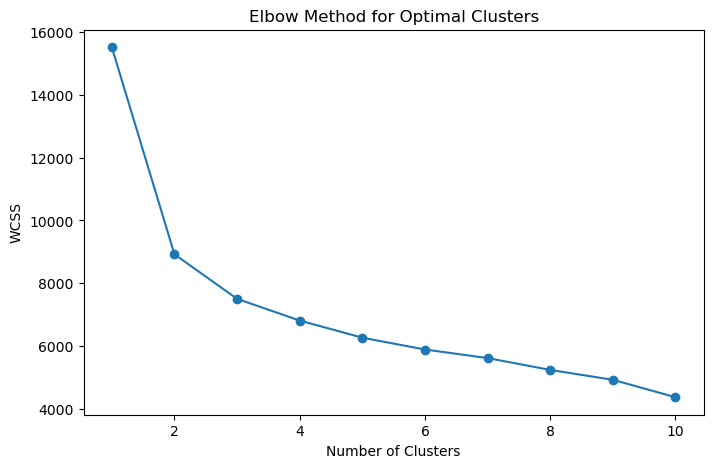

In [43]:
# Elbow Method for K-Means
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


### Silhouette Score
The **Silhouette Score** helps validate the clustering quality.


In [44]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"For k={k}, Silhouette Score: {score}")


For k=2, Silhouette Score: 0.48434504858150335
For k=3, Silhouette Score: 0.40765896764697074
For k=4, Silhouette Score: 0.3742663388215289
For k=5, Silhouette Score: 0.38767596535294685
For k=6, Silhouette Score: 0.3961865466121985
For k=7, Silhouette Score: 0.35882485274836684
For k=8, Silhouette Score: 0.3139077688477743
For k=9, Silhouette Score: 0.30380143094512885
For k=10, Silhouette Score: 0.3048071970046583


## Applying K-Means Clustering
After determining the optimal `k`, we apply **K-Means Clustering**.


C:\Users\moury\AppData\Local\Temp\ipykernel_15836\940158278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)
C:\Users\moury\AppData\Local\Temp\ipykernel_15836\940158278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['PCA1'] = pca_data[:, 0]
C:\Users\moury\AppData\Local\Temp\ipykernel_15836\940158278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

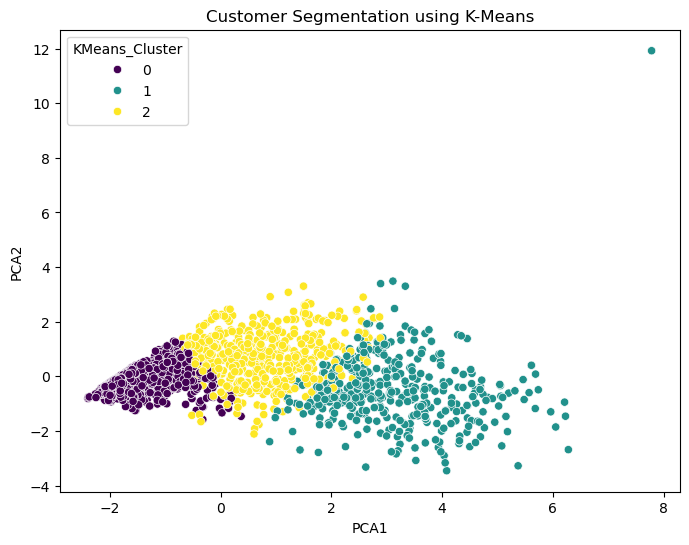

In [45]:
optimal_k = 3  # Change based on elbow method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_selected['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizing Clusters
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
df_selected['PCA1'] = pca_data[:, 0]
df_selected['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df_selected['KMeans_Cluster'], palette='viridis', data=df_selected)
plt.title('Customer Segmentation using K-Means')
plt.show()


## Applying DBSCAN Clustering
DBSCAN identifies clusters based on density and helps detect outliers.


C:\Users\moury\AppData\Local\Temp\ipykernel_15836\3287204731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)


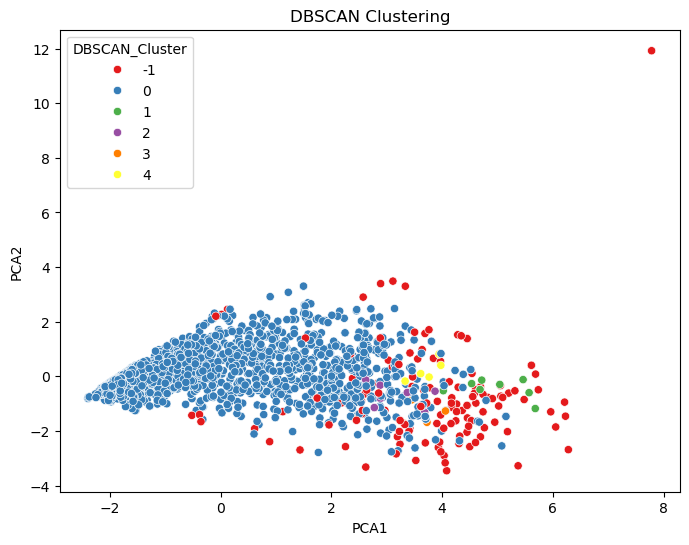

In [46]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust parameters
df_selected['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Plot DBSCAN results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df_selected['DBSCAN_Cluster'], palette='Set1', data=df_selected)
plt.title('DBSCAN Clustering')
plt.show()


## Applying Hierarchical Clustering
Hierarchical Clustering uses a **dendrogram** to find clusters.


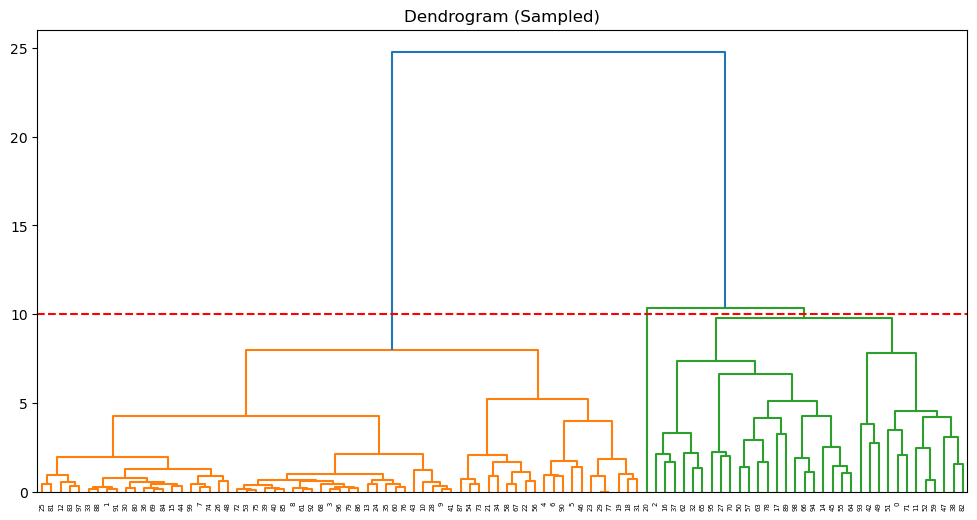

In [47]:
# Plot a simplified dendrogram for a subset of data
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled[:100], method='ward'))  # Sampled data
plt.axhline(y=10, color='r', linestyle='--')
plt.title("Dendrogram (Sampled)")
plt.show()


### Applying Agglomerative Clustering
Instead of manually counting clusters, we apply **Agglomerative Clustering**.


C:\Users\moury\AppData\Local\Temp\ipykernel_15836\3243280988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Hierarchical_Cluster'] = hc.fit_predict(df_scaled)


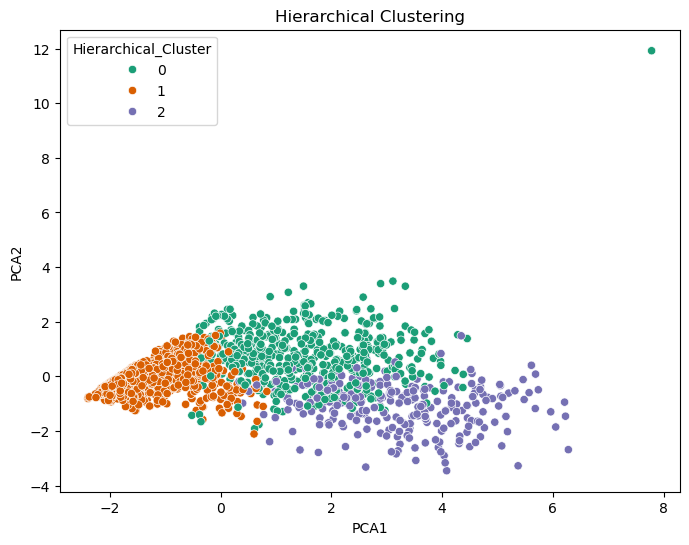

In [48]:
# Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df_selected['Hierarchical_Cluster'] = hc.fit_predict(df_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df_selected['Hierarchical_Cluster'], palette='Dark2', data=df_selected)
plt.title('Hierarchical Clustering')
plt.show()


## Comparing Clustering Algorithms
This table compares the different clustering methods applied to our dataset.


In [52]:
# Function to evaluate clustering quality
def evaluate_clustering(X, labels, method_name):
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1  # Avoid error for single cluster
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f"📊 {method_name} Clustering Evaluation:")
    print(f"   ✅ Silhouette Score: {silhouette:.4f} (Higher is better)")
    print(f"   ✅ Davies-Bouldin Score: {davies_bouldin:.4f} (Lower is better)")
    print(f"   ✅ Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")
    print("-" * 50)

# Evaluate K-Means
evaluate_clustering(df_scaled, df_selected['KMeans_Cluster'], "K-Means")

# Evaluate DBSCAN (Only if multiple clusters exist)
if len(set(df_selected['DBSCAN_Cluster'])) > 1:
    evaluate_clustering(df_scaled, df_selected['DBSCAN_Cluster'], "DBSCAN")
else:
    print("❌ DBSCAN failed to form multiple clusters.")

# Evaluate Hierarchical Clustering
evaluate_clustering(df_scaled, df_selected['Hierarchical_Cluster'], "Hierarchical Clustering")

📊 K-Means Clustering Evaluation:
   ✅ Silhouette Score: 0.4077 (Higher is better)
   ✅ Davies-Bouldin Score: 1.4911 (Lower is better)
   ✅ Calinski-Harabasz Index: 1181.1550 (Higher is better)
--------------------------------------------------
📊 DBSCAN Clustering Evaluation:
   ✅ Silhouette Score: 0.3706 (Higher is better)
   ✅ Davies-Bouldin Score: 1.7422 (Lower is better)
   ✅ Calinski-Harabasz Index: 91.9702 (Higher is better)
--------------------------------------------------
📊 Hierarchical Clustering Clustering Evaluation:
   ✅ Silhouette Score: 0.4339 (Higher is better)
   ✅ Davies-Bouldin Score: 1.6704 (Lower is better)
   ✅ Calinski-Harabasz Index: 1071.6032 (Higher is better)
--------------------------------------------------


In [53]:
df_comparison = df_selected[['KMeans_Cluster', 'DBSCAN_Cluster', 'Hierarchical_Cluster']]
print(df_comparison.head(10))


   KMeans_Cluster  DBSCAN_Cluster  Hierarchical_Cluster
0               1               0                     2
1               0               0                     1
2               2               0                     0
3               0               0                     1
4               0               0                     1
5               2               0                     0
6               2               0                     1
7               0               0                     1
8               0               0                     1
9               0               0                     1


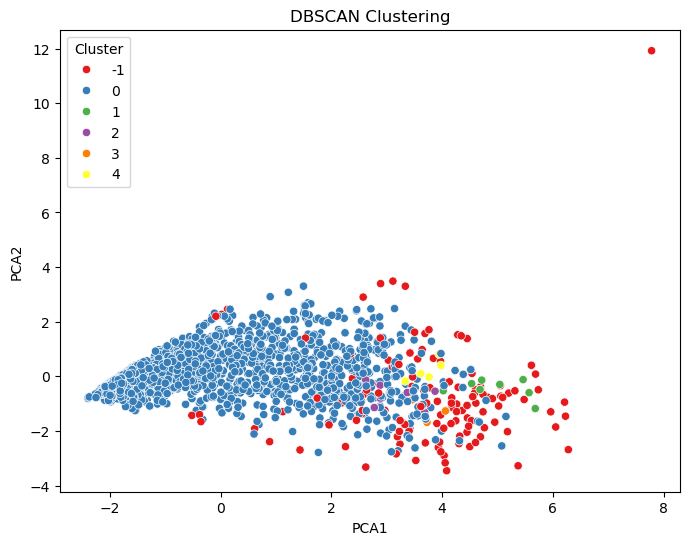

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df_selected['DBSCAN_Cluster'], palette='Set1', data=df_selected)
plt.title('DBSCAN Clustering')
plt.legend(title='Cluster')
plt.show()


# 🚀 Key Insights

### 1️⃣ Hierarchical Clustering  
✅ **Best Silhouette Score** (0.4339) → Clusters are **well-separated**.  

### 2️⃣ K-Means Clustering  
✅ **Best Davies-Bouldin Score** (1.4911) and **Best Calinski-Harabasz Index** (1181.1550)  
✅ Suggests **well-defined, compact clusters**.  

### 3️⃣ DBSCAN Clustering *(Performs the worst)*  
❌ **Silhouette Score (0.3706) is low** → **Overlapping clusters**.  
❌ **Calinski-Harabasz Index (91.97) is extremely low** → **Weak cluster separation**.  
❌ **Davies-Bouldin Score (1.7422) is highest** → **Poor clustering quality**.  

---

## 🔹 Best Algorithm for Customer Segmentation?  
✔ **K-Means Clustering** is the **best overall choice** due to its **balanced performance**.  
✔ **Hierarchical Clustering** has a slightly better **Silhouette Score**, but it **does not scale well** for large datasets.  
❌ **DBSCAN does not work well** in this case, likely due to **varying densities** or an **inappropriate choice of `eps` and `min_samples`**.  

 


# Conclusion
- **K-Means**: Works well for spherical clusters but is sensitive to outliers.
- **DBSCAN**: Detects non-spherical clusters and outliers but struggles with high-dimensional data.
- **Hierarchical Clustering**: Provides a clear hierarchy of clusters but is computationally expensive.

By analyzing the clusters, businesses can identify **high-value customers**, **budget-conscious shoppers**, and **average spenders**, improving targeted marketing strategies.
